### EE 421/521 Image Processing - Spring 2021-22

## Project 2 - Image Enhancement

#### Submission deadline: 3 March 2022

In this project, you will implement the following:

1. Histogram calculation
2. Histrogram equalization for image enhancement
3. Histogram matching

Make sure to submit both .ipynb and .html files.

**This project will be graded for both EE 421 (HW1) and EE 521 (HW1) students.**

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

************************************
***Metin Arda Köker***
************************************

In [1]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# histogram calculation
from skimage import exposure

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

In [2]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data type to uint8

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    assert imgRGB.shape[2] == 3
    
    # get the luminance data
    imgLum = color.rgb2gray(imgRGB)

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

In [3]:
# my function to convert float image data from range [0, 1] to range [0, 255], 
# and then set data type to uint8

def my_float2int(img):
    
    img = np.round(img * 255, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

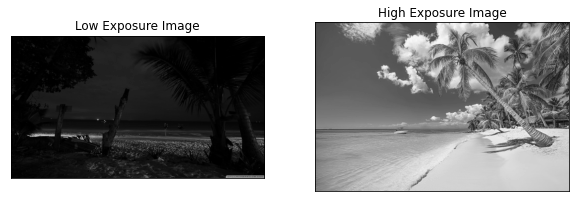

In [4]:
# STEP 1 Pick two different images, one with low exposure (i.e., a dark image) 
# and one with high exposure (i.e., a bright image). Find and display their luminance.

# set YOUR image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week2'

# read YOUR under exposed image 
image_file = r'/low_exposed.jpg'
image_path = image_folder + image_file
imgRGB_low = io.imread(image_path)

# read YOUR over exposed image 
image_file = r'/high_exposed.jpg'
image_path = image_folder + image_file
imgRGB_high = io.imread(image_path)

# calculate the luminance image
img_low = my_imgLuminance(imgRGB_low)
img_high = my_imgLuminance(imgRGB_high)

# display both images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

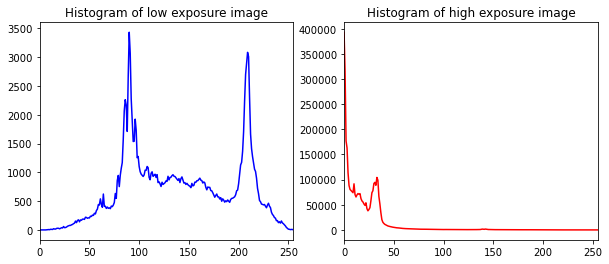

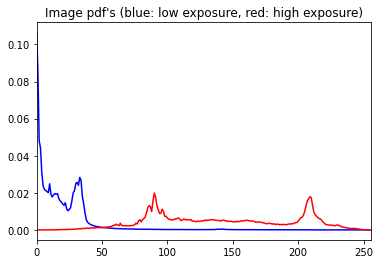

In [5]:
# ==================================
# (1) Histogram calculation
# ==================================

# ADD YOUR CODE HERE

# 1.1 write a function to calculate the histogram of an image
def calcHistogram( img):
    
    # calculate histogram here
    histogram,bins = exposure.histogram(img, source_range='dtype') # change this
         
    return histogram
# end of function

# 1.2 calculate the histograms using the above function
HistofHighImg = calcHistogram(img_high)
HistofLowImg = calcHistogram(img_low)

# 1.3 calculate the pdf's
pdf_high = HistofHighImg / HistofHighImg.sum()
pdf_low = HistofLowImg / HistofLowImg.sum()

# 1.4 display the histograms and pdf's
plt.figure(figsize=(10,4))
plt.subplot(121), plt.plot(HistofHighImg, 'b')
plt.xlim(0, 255)
plt.title('Histogram of low exposure image')
plt.subplot(122), plt.plot(HistofLowImg, 'r')
plt.xlim(0, 255)
plt.title('Histogram of high exposure image')
plt.show()
plt.close()
plt.plot(pdf_low, 'b')
plt.xlim([0,256])
plt.plot(pdf_high, 'r')
plt.xlim([0,256])
plt.title("Image pdf's (blue: low exposure, red: high exposure)")
plt.show()


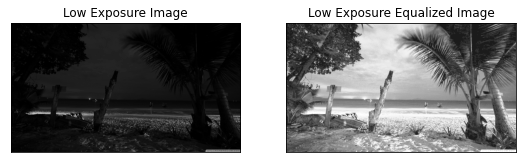

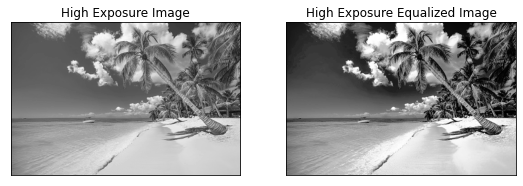

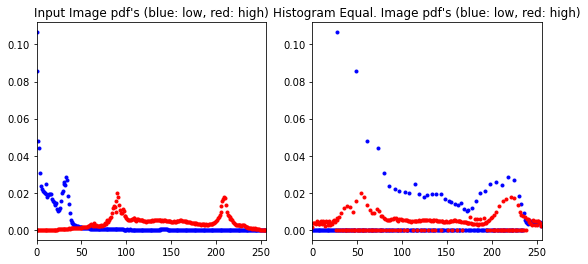

In [6]:
# ===============================
# (2) Histrogram equalization
# ===============================

# ADD YOUR CODE HERE

# 2.1 write a function to equalize the histogram of an image
def equalizeHistogram( img):
    
    # calculate histogram equalized image here
    imgEqualized = exposure.equalize_hist(img) # change this
    imgEqualized = my_float2int(imgEqualized)

    return imgEqualized

# end of function

# 2.2 obtain the histogram equalized images using the above function
my_img_low_eq = equalizeHistogram(img_low)
my_img_high_eq = equalizeHistogram(img_high)

# 2.3 calculate the pdf's of the histogram equalized images
hist_low_eq  = calcHistogram(my_img_low_eq)
hist_high_eq = calcHistogram(my_img_high_eq)

pdf_low_eq = hist_low_eq / hist_low_eq.sum()
pdf_high_eq = hist_high_eq / hist_high_eq.sum()

# 2.4 display the histogram equalized images and their pdf's
plt.figure(figsize=(14,8))
plt.subplot(231), plt.imshow(img_low, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(my_img_low_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()
plt.figure(figsize=(14,8))
plt.subplot(231), plt.imshow(img_high, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(my_img_high_eq, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

plt.figure(figsize=(14,4))
plt.subplot(131), plt.plot(pdf_low, '.b'), plt.xlim([0,256])
plt.plot(pdf_high, '.r'), plt.xlim([0,256])
plt.title("Input Image pdf's (blue: low, red: high)")
plt.subplot(132), plt.plot(pdf_low_eq, '.b'), plt.xlim([0,256])
plt.plot(pdf_high_eq, '.r'), plt.xlim([0,256])
plt.title("Histogram Equal. Image pdf's (blue: low, red: high)")
plt.show()
plt.close()

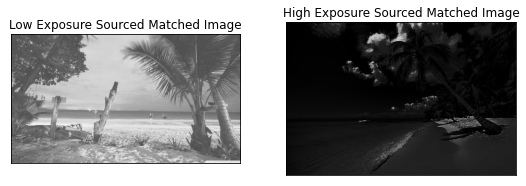

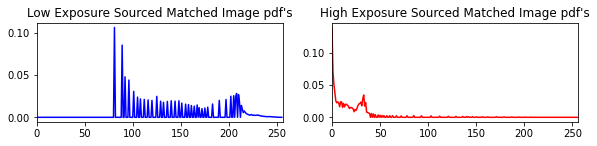

In [7]:
# ===============================
# (3) Histogram matching
# ===============================

# ADD YOUR CODE HERE

# 3.1 write a function to match the histogram of one image to that of another image
def matchHistogram( imgSource, imgTarget):
    
    # calculate the histogram matched image here
    img_matched = exposure.match_histograms(imgSource, imgTarget, multichannel=False)
    
    
    
    
    np.round(img_matched, 0, img_matched)
    imgMatched = img_matched.astype(np.uint8)

    return imgMatched

# end of function

# 3.2 obtain the histogram matched image using the above function
Low_img_matched = matchHistogram(img_low, img_high)
High_img_matched = matchHistogram(img_high, img_low)

# 3.3 calculate the pdf of the histogram matched image
Low_hist_matched = calcHistogram(Low_img_matched)
High_hist_matched = calcHistogram(High_img_matched)

Low_pdf_matched = Low_hist_matched / Low_hist_matched.sum()
High_pdf_matched = High_hist_matched / High_hist_matched.sum()

# 3.4 display the histogram matched image and its pdf
plt.figure(figsize=(14,8))
plt.subplot(231), plt.imshow(Low_img_matched, cmap = 'gray', vmin=0, vmax=255)
plt.title('Low Exposure Sourced Matched Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(High_img_matched, cmap = 'gray', vmin=0, vmax=255)
plt.title('High Exposure Sourced Matched Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

plt.figure(figsize=(15,4))
plt.subplot(231), plt.plot(Low_pdf_matched, 'b'), plt.xlim([0,256])
plt.title("Low Exposure Sourced Matched Image pdf's")
plt.subplot(232), plt.plot(High_pdf_matched, 'r'), plt.xlim([0,256])
plt.title("High Exposure Sourced Matched Image pdf's")
plt.show()
plt.close()

*STEP 4 Comments on the results*

*ADD YOUR COMMENTS HERE*

(a) Compare the histogram equalized images obtained in Step 2 with the original images in Step 1. Comment on any improvements in the visual quality.
The changed images are better than the original images, because there are too many pixels in average the same colors. The functions widen the width for the pixels which are nearly the same colored pixels. So that the low exposure image can contain light color of gray, and the high exposure image can contain dark color of gray.
...

(b) Comment on the appearance of the histogram matched image obtained in Step 3. Why would one  use histogram matching?
 The source image data will change in order to be like the target image. The histogram will get wider or narrower depending on the target image without losing too much data of the source image. So that we will have an image that target image features on the source image. This method can be used to make objects more clear for specific light differences. In image recognition this method could be helpful to differentiate image to parts.
...
